<h1 align=center>Assignment 2</h1>

## Due Wednesday, September 23, by 11:59:59 p.m. 

Let a,b,c,d be the last 4 non-zero digits of your banner enumber _in non-descending order_ $a \le b \le c \le d$. For example, if your Enumber is E99943040, then a=3, b=4, c=4, and d=9. 

Remember to start by entering __%pylab__ mode and importing the future!!

In [2]:
%pylab inline
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


__1.__ (5 points) Write a procedure that implements the function

$$ f(x) = \frac{x^b + x^c + x^d}{3} $$ 

In [3]:
a = 2; b = 4; c = 4; d = 6

In [4]:
def func(x):
    return (x**a + x**c + x**d)/3

<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>
__2.__ (5 points) Now use your function in __1__ as an argument in the __MonteCarloIntegrator__ I have defined below. Explain below what the output of the MonteCarloIntegrator is and what it means.   

In [8]:
def MonteCarloIntegrator( f, N=10000 ):
    """MonteCarloIntegrator(f) -> estimate, sigmaXi/sqrt(N)
    
    f must be a procedure that returns only one number for each input
    
    
    Options: 
    
    N = number of random trials returned (10,000 is default)
    
    Returns: 
    
    estimate = an estimate of the integral of f over [0,1]
    
    """
    
    cnt = 0
    for i in range(N):
        x = rand()
        y = rand()
        if( f(x) > y ): 
            cnt += 1
    An = cnt / N
    sigmaXi = An - An**2
    
    sigmaXioversqrtN = sigmaXi/sqrt(N)
    
    return An, sigmaXioversqrtN
    

In [9]:
MonteCarloIntegrator(func)

(0.2268, 0.0017536176000000001)

In [7]:
# an=[func(rand())for i in range(10000)]; std(an)/math.sqrt(10000)

Explain the output of the __MonteCarloIntegrator__ as applied to your function in the text box below: 

__Solution__:

Interpretation: $A_n$ is the estimate of the integral of f over [0,1]

The sigmaXioversqrtN is the estimation of the error of integral estimation.

<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>

__3.__ (10 points) Write a program which implements the following simulation: 

__Random Hailstones:__ Start by letting __x__ have the value __abcd__, and for any given x, do the following:  If __x__ is even, divide by 2, but if __x__ is odd, then flip a fair coin.  If heads (i.e., 1), multiply by 3 and add 1, but if tails (i.e., 0), multiply by 3 and subtract 1.   

Simulation should iteratively apply the random hailstones to update __x__ for no more than 1000 times, but it should stop as soon it reaches 1.  It should return the number of steps until it reaches 1, or return 1000 if it never reaches 1.  

In [10]:
X = a*10**3+b*10**2+c*10**1+d
def Hailstones(N=1000, x = X): # N: times of simulation
    if N>1000:
        print "N cannot be more than 1000"
        return
    steps = 0
    while x!=1 and steps < N:
        if(x%2 == 0):
            x = x/2
        else:
            if(randint(0,2)==1): # Heads
                x = x*3+1
            else: 
                x = 3*x -1
        steps = steps +1
    return steps

<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>
__4.__ ( 5 points) Run your simulation in #3 for 10000 times to generate a list of 10000 trials:


In [11]:
trails=[Hailstones() for i in range(10000)]; print(trails),

[63, 19, 63, 76, 91, 68, 19, 86, 50, 50, 91, 63, 19, 76, 262, 76, 63, 50, 156, 19, 19, 19, 19, 81, 63, 63, 76, 19, 63, 94, 50, 86, 76, 161, 50, 19, 94, 125, 19, 107, 19, 76, 50, 55, 76, 45, 45, 107, 156, 19, 19, 89, 81, 45, 102, 19, 73, 78, 19, 19, 63, 76, 179, 63, 86, 76, 55, 50, 32, 112, 169, 19, 138, 99, 50, 107, 94, 89, 182, 125, 63, 32, 19, 19, 42, 76, 45, 89, 50, 19, 45, 63, 63, 153, 19, 19, 50, 50, 45, 94, 50, 19, 45, 138, 112, 19, 143, 81, 50, 50, 182, 117, 19, 138, 50, 63, 76, 37, 81, 81, 68, 125, 19, 86, 76, 19, 19, 63, 76, 68, 76, 19, 50, 135, 138, 50, 81, 19, 94, 50, 19, 50, 112, 19, 91, 50, 19, 138, 19, 104, 32, 50, 187, 63, 107, 89, 50, 45, 55, 63, 19, 81, 133, 19, 19, 19, 81, 32, 63, 63, 19, 19, 19, 63, 50, 63, 19, 19, 94, 107, 50, 63, 81, 19, 19, 63, 143, 91, 50, 94, 45, 81, 50, 19, 19, 81, 19, 19, 140, 50, 19, 19, 32, 19, 32, 50, 218, 58, 107, 50, 81, 19, 19, 262, 45, 117, 112, 76, 71, 50, 32, 107, 76, 81, 153, 50, 63, 68, 169, 76, 50, 81, 94, 94, 89, 81, 156, 81, 99, 

<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>
__5.__ (5 points) Calculate __An__ and then use the central limit theorem to estimate $\sigma({\bf An})$.  Explain your results and what it means about the simulation you wrote in exercise 3. 

__Solution:__

$A_n  = \int_{\Omega}f(x) \, dx$ where $x_1, \cdots, x_N\in \Omega$ for $N = 10000$

$A_n \approx \frac{1}{N} \sum_{i=1}^N f(x_i) = 65.39$

By the law of large number, $\sigma({\bf An}) = \frac{\sigma_N}{\sqrt{N}} = 43.093/100 = 0.431$





In [14]:
print "An is %.9f and sigmaAn is %.9f" % (mean(trails),std(trails)/100)

An is 65.388900000 and sigmaAn is 0.430928005


<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>
__6.__ (10 points) Notice that $x^{2c}+y^{2d} = 1$ is a closed curve inside the square $\left\lbrace (x,y) | -1 \le x \le 1, -1 \le y \le 1 \right\rbrace$.  Write a program which generates a point at random in this square and returns 1 if it is inside the curve and 0 otherwise. 

In [16]:
c2 = 2*4; d2 = 2*6
def cur():
    x = 2*rand() - 1
    y = 2*rand() - 1
    if x**c2 + y**d2 < 1:
        return 1
    else: return 0

<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>
__7.__ ( 5 points) Run your simulation in #6 for 10000 times to generate a list of 10000 trials:

In [18]:
trails=[cur() for i in range(10000)]

In [19]:
from collections import Counter
Counter(trails)

Counter({0: 140, 1: 9860})

<p> &nbsp; </p><p> &nbsp; </p><p> &nbsp; </p>
__8.__ (5 points) Calculate __An__ and then use the central limit theorem to estimate $\sigma({\bf An})$.  Explain your results and what it means about the simulation you wrote in exercise 6. In particular, what is the area inside the curve $x^{2c}+y^{2d} = 1 $? 

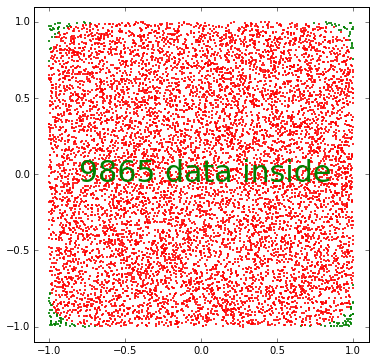

In [21]:
from pylab import plot,show,axis
from numpy import random,sqrt,pi

# scattering n points over the unit square
NUM_POINTS = 10000
c2 = 2*4; d2 = 2*6
cnt = 0


# Randomly generate points (x[i], y[i]) such that -1 <= x[i] = 1 and -1 <= y[i] <= 1.
x = [2*rand() - 1 for i in xrange(NUM_POINTS)]
y = [2*rand() - 1 for i in xrange(NUM_POINTS)]

circle_x = []
circle_y = []

outsiders_x = []
outsiders_y = []

trails = []

# Determine which points are inside the circle (and for visualization purposes, also
# determine which are outside the circle).
for i in xrange(NUM_POINTS):
    if x[i]**c2 + y[i]**d2 < 1:
        circle_x.append(x[i])
        circle_y.append(y[i])
        cnt += 1
        trails.append(x[i]**c2 + y[i]**d2 < 1)
    else:
        outsiders_x.append(x[i])
        outsiders_y.append(y[i])
        trails.append(x[i]**c2 + y[i]**d2 < 1)

# Plot it.
fig = plt.figure()
fig.set_size_inches(6, 6)
_ = scatter(outsiders_x, outsiders_y, s=1, color='green')
_ = scatter(circle_x, circle_y, s=1, color='red')
_ = text(-0.8, -0.05, '9865 data inside', fontsize = 30,
           color = 'green')
_ = axis([-1.1,1.1,-1.1,1.1]) 

In [26]:
An = cnt / NUM_POINTS; An = An
#Counter(trails)[1] / float(len(trails))
sigmaXi = An - An**2
sigmaXioversqrtN = sigmaXi/sqrt(NUM_POINTS)
An = 4*An; sigmaXioversqrtN = 4*sigmaXioversqrtN
print("the integrated value of function, that is, the area inside the curve, A_n is %.9f and the error, sigma_An is %.9f." % (An, sigmaXioversqrtN))

the integrated value of function, that is, the area inside the curve, A_n is 3.938000000 and the error, sigma_An is 0.000610390.


__LEAVE ALL RESULTS AND WORK IN THE NOTEBOOK. TURN IN THIS NOTEBOOK VIA THE DROPBOX BY 11:59:59 on Wednesday, Sept. 23, 2015  __

KEY FOR PROGRAMMING STEPS (1,3,6) WILL BE POSTED THURSDAY AT 1:00 a.m.  If you are unable to do any of the programming steps (1,3,6) or feel they may be incorrect, then you can turn in the notebook again by 11:59:59 on Thursday, Sept. 24, but you will only get credit for the non-programming steps.